In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

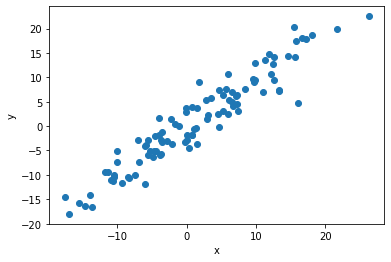

In [2]:
X = torch.randn(100,1)*10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
torch.manual_seed(1)
model = LR(1,1)

In [5]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())
b

Parameter containing:
tensor([-0.4414], requires_grad=True)

In [6]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X,y)
    plt.show()

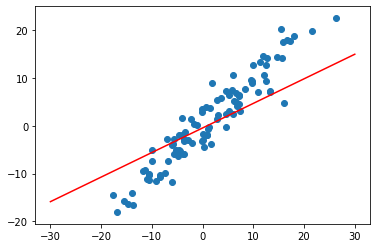

In [7]:
plot_fit('Initial Model')

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [14]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print('epoch:',i,'loss' ,loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss 8.163704872131348
epoch: 1 loss 8.163654327392578
epoch: 2 loss 8.163606643676758
epoch: 3 loss 8.163559913635254
epoch: 4 loss 8.1635160446167
epoch: 5 loss 8.163471221923828
epoch: 6 loss 8.163430213928223
epoch: 7 loss 8.163390159606934
epoch: 8 loss 8.163351058959961
epoch: 9 loss 8.163315773010254
epoch: 10 loss 8.163280487060547
epoch: 11 loss 8.163246154785156
epoch: 12 loss 8.163212776184082
epoch: 13 loss 8.16318130493164
epoch: 14 loss 8.163150787353516
epoch: 15 loss 8.163121223449707
epoch: 16 loss 8.163094520568848
epoch: 17 loss 8.163067817687988
epoch: 18 loss 8.163043022155762
epoch: 19 loss 8.163017272949219
epoch: 20 loss 8.162993431091309
epoch: 21 loss 8.162971496582031
epoch: 22 loss 8.162948608398438
epoch: 23 loss 8.162927627563477
epoch: 24 loss 8.162906646728516
epoch: 25 loss 8.162886619567871
epoch: 26 loss 8.162869453430176
epoch: 27 loss 8.162851333618164
epoch: 28 loss 8.162832260131836
epoch: 29 loss 8.162817001342773
epoch: 30 loss 8.162799

Text(0.5, 0, 'epochs')

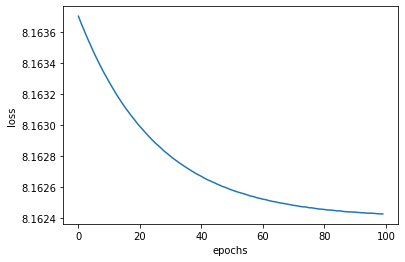

In [15]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')

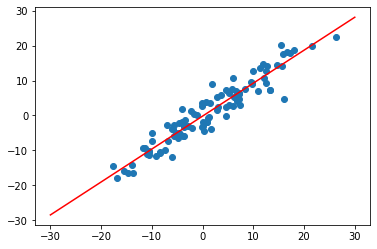

In [16]:
plot_fit('Trained Model')